### Import all Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

### Import Data

In [ ]:
df = pd.read_csv("creditcard.csv")
df.head(10)

### Time: This shows how many seconds have passed since the first transaction in the dataset.
### V1-V28: Special features created to hide sensitive information about the original data.
### Amount: Transaction amount.
### Class: Target variable (0 for normal transactions, 1 for fraudulent transactions)

In [9]:
df.shape

(284807, 31)

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Analysing Class Distribution

In [11]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


### Exploring Transaction amounts

In [12]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Correlation Matrix

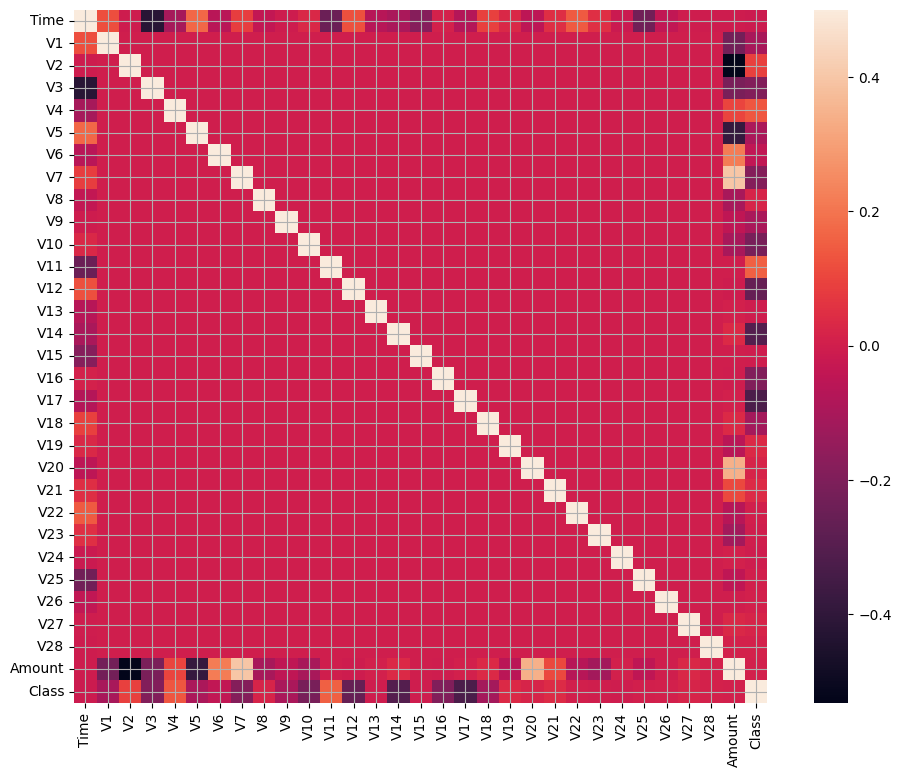

In [13]:
corrmat = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax = .5, square = True,color='k')
plt.grid()
plt.show()

### Preparing the Data into dependent and independent variable and then train,test and split the data

In [17]:
x= df.drop(['Class'], axis = 1)
y= df["Class"]
x.shape
y.shape

xdf = x.values
ydf = y.values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdf, ydf, test_size = 0.2, random_state = 42)

In [18]:
x_train

array([[ 1.43352000e+05,  1.95504092e+00, -3.80782711e-01, ...,
         4.51682478e-02, -4.71447917e-02,  9.99000000e+00],
       [ 1.17173000e+05, -4.00975239e-01, -6.26942769e-01, ...,
        -3.70468822e-01, -1.44791686e-01,  4.59000000e+01],
       [ 1.49565000e+05,  7.25090164e-02,  8.20565650e-01, ...,
         2.06394866e-01,  7.02877702e-02,  1.19900000e+01],
       ...,
       [ 7.97950000e+04, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01,  3.94000000e+00],
       [ 8.79310000e+04, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01,  1.00000000e+00],
       [ 7.63810000e+04,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  1.13000000e+02]],
      shape=(227845, 30))

In [19]:
y_train

array([0, 0, 0, ..., 0, 0, 0], shape=(227845,))

In [21]:
x_test

array([[ 4.15050000e+04, -1.65265066e+01,  8.58497180e+00, ...,
        -2.01857525e+00, -1.04280417e+00,  3.64190000e+02],
       [ 4.42610000e+04,  3.39812064e-01, -2.74374524e+00, ...,
         4.09958027e-02,  1.02037825e-01,  5.20120000e+02],
       [ 3.54840000e+04,  1.39959027e+00, -5.90701288e-01, ...,
         1.14086454e-02,  4.63414166e-03,  3.10000000e+01],
       ...,
       [ 1.42491000e+05,  4.04414982e-02, -1.09736789e-01, ...,
         3.57844730e-01,  3.54379443e-01,  7.63000000e+00],
       [ 5.91570000e+04, -4.95047586e-01,  9.91480934e-01, ...,
         4.05292111e-02, -2.69775457e-01,  3.59000000e+00],
       [ 4.88640000e+04, -1.59048567e+00,  9.92415466e-01, ...,
         1.25749856e-01, -6.07225509e-01,  9.06310000e+02]],
      shape=(56962, 30))

In [20]:
y_test

array([1, 0, 0, ..., 0, 0, 0], shape=(56962,))

### Building and trainig the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_Pred = rfc.predict(x_test)

### Evaluating the Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)
mcc = matthews_corrcoef(y_test, y_Pred)
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
conf_matrix = confusion_matrix(y_test, y_Pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()